<h1 align=center>Paralelizando o treinamento de rede neural com o TensorFlow</h1>
<p align=center><img src=https://www.tensorflow.org/images/tf_logo_social.png?hl=pt-br width=500></p>

O *TensorFlow* é uma das bibliotecas de aprendizado profundo mais populares atualmente disponíveis e nos permite implementar redes neurais (RN) com muito mais eficiência do que qualquer uma de nossas implementações NumPy anteriores. Agora, começaremos a usar o *TensorFlow* e veremos como ele traz benefícios significativos para o desempenho do treinamento.

### *TensorFlow* e desempenho de treinamento
O *TensorFlow* pode acelerar significativamente nossas tarefas de aprendizado de máquina. Para entender como ele pode fazer isso, vamos começar discutindo alguns dos desafios de desempenho que normalmente encontramos quando executamos cálculos caros em nosso hardware. Em seguida, analisaremos em alto nível o que é o *TensorFlow* e qual será nossa abordagem de aprendizado.

### Como aprenderemos o *TensorFlow*
Primeiro, abordaremos o modelo de programação do *TensorFlow*, em particular, a criação e manipulação de tensores. Em seguida, veremos como carregar dados e utilizar objetos *TensorFlow* Dataset, o que nos permitirá iterar por meio de um conjunto de dados de forma eficiente. Além disso, discutiremos os conjuntos de dados existentes e prontos para uso no submódulo `tensorflow_datasets` e aprenderemos como usá-los.

Depois de aprender sobre esses conceitos básicos, a API `tf.keras` será introduzida e avançaremos para a construção de modelos de aprendizado de máquina, aprenderemos a compilar e treinar os modelos e aprenderemos a salvar os modelos treinados em disco para avaliação futura.

### Primeiros passos com o *TensorFlow* 

Vamos dar os primeiros passos no uso da API *TensorFlow* de baixo nível. Depois de instalar o *TensorFlow*, abordaremos como criar tensores no *TensorFlow* e diferentes maneiras de manipulá-los, como alterar sua forma, tipo de dados e assim por diante.

### Instalando o *TensorFlow*
Dependendo de como seu sistema está configurado, normalmente você pode usar o instalador `pip` do *Python* e instalar o *TensorFlow* do *PyPI* executando o seguinte no seu terminal:

`pip install tensorflow`

Isso instalará a versão estável mais recente. Para garantir que o código apresentado neste capítulo possa ser executado conforme o esperado, é recomendável usar o *TensorFlow* 2.0.0, que pode ser instalado especificando a versão explicitamente:

`pip install tensorflow==[versão desejada]`

### Criando tensores no *TensorFlow*
Agora, vamos considerar algumas maneiras diferentes de criar tensores e, em seguida, ver algumas de suas propriedades e como manipulá-las. Em primeiro lugar, podemos simplesmente criar um tensor de uma lista ou um array *NumPy* usando a função `tf.convert_to_tensor` da seguinte forma:

In [19]:
import tensorflow as tf
import numpy as np
np.set_printoptions(precision=3)

a = np.array([1,2,3], dtype=np.int32)
b = [4,5,6]

t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

print(t_a)
print(t_b)


tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


Isso resultou nos tensores $\small t_a$ e $\small t_b$, com suas propriedades, `shape=(3,)` e `dtype=int32`, adotadas de sua fonte. Semelhante aos *arrays* *NumPy*, podemos ver ainda mais estas propriedades:

In [20]:
t_ones = tf.ones((2,3))
t_ones.shape

TensorShape([2, 3])

Para obter acesso aos valores aos quais um tensor se refere, podemos simplesmente chamar o método `.numpy()` em um tensor:

In [21]:
t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

Finalmente, a criação de um tensor de valores constantes pode ser feita da seguinte forma:

In [22]:
const_tensor = tf.constant([1.2,5, np.pi], dtype=tf.float32)

print(const_tensor)

tf.Tensor([1.2   5.    3.142], shape=(3,), dtype=float32)


### Manipulando o tipo de dados e a forma de um tensor
Aprender maneiras de manipular tensores é necessário para torná-los compatíveis para entrada em um modelo ou operação. Agora, você aprenderá a manipular tipos e formas de dados de tensor por meio de várias funções do *TensorFlow* que convertem (`cast`), remodelam(`reshape`), transpõem(`transpose`) e compactam(`squeeze`).

A função `tf.cast()` pode ser usada para alterar o tipo de dados de um tensor para um tipo desejado:

In [23]:
t_a_new = tf.cast(t_a, tf.int64)
print(t_a_new.dtype)

<dtype: 'int64'>


Como você verá mais a frente, certas operações requerem que os tensores de entrada tenham um certo número de dimensões (ou seja, *rank*) associadas a um certo número de elementos (*shape*). Assim, podemos precisar alterar a forma de um tensor, adicionar uma nova dimensão ou espremer uma dimensão desnecessária. O *TensorFlow* fornece funções (ou operações) úteis para conseguir isso, como `tf.transpose()`, `tf.reshape()` e `tf.squeeze()`. Vejamos alguns exemplos:

In [24]:
# Transpondo um tensor
t = tf.random.uniform(shape=(3,5))
t_tr = tf.transpose(t)
print("Transpondo um tensor:\n", t.shape, '---->', t_tr.shape,'\n')

# Remodelando um tensor (por exemplo, de um vetor 1D para uma matriz 2D)
t = tf.zeros((30,))
t_reshape = tf.reshape(t, shape=(5, 6))
print("Remodelando um tensor:\n", t.shape,'--->', t_reshape.shape,"\n")

# Removendo as dimensões desnecessárias (dimensões que possuem tamanho 1, que não são necessárias):

t = tf.zeros((1, 2, 1, 4, 1))
t_sqz = tf.squeeze(t, axis=(2, 4))
print("Removendo as dimensões:\n",t.shape, '---> ', t_sqz.shape)

Transpondo um tensor:
 (3, 5) ----> (5, 3) 

Remodelando um tensor:
 (30,) ---> (5, 6) 

Removendo as dimensões:
 (1, 2, 1, 4, 1) --->  (1, 2, 4)


### Aplicando operações matemáticas a tensores
A aplicação de operações matemáticas, em particular operações de álgebra linear, é necessária para construir a maioria dos modelos de aprendizado de máquina. Abordaremos algumas operações de álgebra linear amplamente usadas, como produto elemento a elemento, multiplicação de matrizes e cálculo da norma de um tensor. Primeiro, vamos instanciar dois tensores aleatórios, um com distribuição uniforme no intervalo [–1, 1) e outro com distribuição normal padrão:

In [25]:
tf.random.set_seed(1)
t1  = tf.random.uniform(shape=(5,2), minval=-1.0, maxval=1.0)
t2  = tf.random.normal(shape=(5,2), mean=0.0, stddev=1.0)


Observe que $\small t1$ e $\small t2$ têm a mesma forma. Agora, para calcular o produto elemento a elemento de $\small t1$ e $\small t2$, podemos usar o seguinte:

In [26]:
t3 = tf.multiply(t1, t2).numpy()
print(t3)

[[-0.27  -0.874]
 [-0.017 -0.175]
 [-0.296 -0.139]
 [-0.727  0.135]
 [-0.401  0.004]]


Para calcular a média, soma e desvio padrão ao longo de um determinado eixo (ou eixos), podemos usar `tf.math.reduce_mean()`, `tf.math.reduce_sum()` e `tf.math.reduce_std()`. Por exemplo, a média de cada coluna em $\small t1$ pode ser calculada da seguinte forma:

In [27]:
t4 = tf.math.reduce_mean(t1, axis=0)
print(t4)

tf.Tensor([0.09  0.207], shape=(2,), dtype=float32)


O produto matriz-matriz entre $\small t1$ e $\small t2$ (ou seja, $\small t_1 \times t_2^T$ , onde o sobrescrito $\small T$ é para transposição) pode ser calculado usando a função `tf.linalg.matmul()` da seguinte forma:

In [28]:
t5 = tf.linalg.matmul(t1, t2, transpose_b=True)
print(t5.numpy())

[[-1.144  1.115 -0.87  -0.321  0.856]
 [ 0.248 -0.191  0.25  -0.064 -0.331]
 [-0.478  0.407 -0.436  0.022  0.527]
 [ 0.525 -0.234  0.741 -0.593 -1.194]
 [-0.099  0.26   0.125 -0.462 -0.396]]


Por outro lado, o cálculo de $\small t_1 \times t_2^T$ é realizado pela transposição de $\small t_1$, resultando em uma matriz de tamanho $\small 2 \times 2$ :

In [29]:
t6 = tf.linalg.matmul(t1, t2, transpose_a=True)
print(t6.numpy())

[[-1.711  0.302]
 [ 0.371 -1.049]]


Finalmente, a função `tf.norm()` é útil para calcular a normal $\small L^p$ de um tensor. Por exemplo, podemos calcular a norma $\small L^2$ de `t1` da seguinte forma:

In [30]:
norm_t1 = tf.norm(t1, ord=2, axis=1).numpy()
print(norm_t1)

[1.046 0.293 0.504 0.96  0.383]


Para verificar se este trecho de código calcula a normal $L^2$ de `t1` corretamente, você pode comparar os resultados com a seguinte função NumPy: `np.sqrt(np.sum(np.square(t1), axis=1))`.

In [31]:
np.sqrt(np.sum(np.square(t1),axis=1))

array([1.046, 0.293, 0.504, 0.96 , 0.383], dtype=float32)

### Dividir, empilhar e concatenar tensores
Abordaremos as operações do *TensorFlow* para dividir um tensor em vários tensores, ou o inverso: empilhar e concatenar vários tensores em um único.
Suponha que temos um único tensor e queremos dividi-lo em dois ou mais tensores. Para isso, o *TensorFlow* fornece uma função  `tf.split()`, que divide um tensor de entrada em uma lista de tensores de tamanho igual.

Podemos determinar o número desejado de divisões como um inteiro usando o argumento `num_or_size_splits` para dividir um tensor ao longo de uma dimensão desejada especificada pelo argumento do eixo. Neste caso, o tamanho total do tensor de entrada ao longo da dimensão especificada deve ser divisível pelo número desejado de divisões. Alternativamente, podemos fornecer os tamanhos desejados em uma lista. Vamos dar uma olhada em um exemplo de ambas as opções:

In [32]:
# Fornecendo o número de divisões (deve ser divisível):
tf.random.set_seed(1)
t = tf.random.uniform((6,))
print(t.numpy())

[0.165 0.901 0.631 0.435 0.292 0.643]


In [33]:
t_splits = tf.split(t, num_or_size_splits=3)
[item.numpy() for item in t_splits]

[array([0.165, 0.901], dtype=float32),
 array([0.631, 0.435], dtype=float32),
 array([0.292, 0.643], dtype=float32)]

Neste exemplo, um tensor de tamanho 6 foi dividido em uma lista de três tensores, cada um com tamanho 2.

* Fornecendo os tamanhos de divisões diferentes:

Alternativamente, em vez de definir o número de divisões, também podemos especificar os tamanhos dos tensores de saída diretamente. Aqui, estamos dividindo um tensor de tamanho 5 em tensores de tamanhos 3 e 2:

In [34]:
tf.random.set_seed(1)
t = tf.random.uniform((5,))
print(t.numpy())

[0.165 0.901 0.631 0.435 0.292]


In [35]:
t_splits = tf.split(t, num_or_size_splits=[3, 2])
[item.numpy() for item in t_splits]

[array([0.165, 0.901, 0.631], dtype=float32),
 array([0.435, 0.292], dtype=float32)]

Às vezes, estamos trabalhando com vários tensores e precisamos concatená-los ou empilhá-los para criar um único tensor. Nesse caso, as funções do *TensorFlow*, como `tf.stack()` e `tf.concat()`, são úteis. Por exemplo, vamos criar um tensor $\small 1D$, $\small A$, contendo $1s$ com tamanho $\small 3$ e um tensor $\small 1D$, $\small B$, contendo $0_s$ com tamanho $\small 2$ e concatená-los em um tensor $\small 1D$, $\small C$, de tamanho $\small 5$:

In [36]:
A = tf.ones((3,))
B = tf.zeros((2,))
C = tf.concat([A, B], axis=0)
print(C.numpy())

[1. 1. 1. 0. 0.]


Se criarmos tensores $\small 1D$ $\small A$ e $\small B$, ambos com tamanho $\small 3$, podemos empilhá-los para formar um tensor $\small 2D$, $\small S$:

In [37]:
A = tf.ones((3,))
B = tf.zeros((3,))
S = tf.stack([A, B], axis=1)
print(S.numpy())

[[1. 0.]
 [1. 0.]
 [1. 0.]]


### Como criar pipelines de entrada usando tf.data – a API do conjunto de dados do *TensorFlow*
Quando estamos treinando um modelo de Rede Neural Profunda, geralmente treinamos o modelo de forma incremental usando um algoritmo de otimização iterativo, como *Gradient Descend* estocástico.

Conforme mencionado no início, a *API Keras* é um *wrapper* em torno do *TensorFlow* para a construção de modelos RN. A *API Keras* fornece um método, `.fit()`, para treinar os modelos. Nos casos em que o conjunto de dados de treinamento é muito pequeno e pode ser carregado como um tensor na memória, os modelos do *TensorFlow* (criados com a *API Keras*) podem usar diretamente esse tensor por meio do método `.fit()` para treinamento.

Em casos de uso típico, no entanto, quando o conjunto de dados é muito grande para caber na memória do computador, precisaremos carregar os dados do dispositivo de armazenamento principal (por exemplo, o disco rígido ou unidade de estado sólido) em pedaços, ou seja, lote por lote (observe o uso do termo "lote" em vez de "mini-lote" para ficar próximo da terminologia do *TensorFlow*). Além disso, podemos precisar construir um *pipeline* de processamento de dados para aplicar certas transformações e etapas de pré-processamento aos nossos dados, como centralização média, dimensionamento ou adição de ruído para aumentar o procedimento de treinamento e evitar *overfitting*.

Aplicar funções de pré-processamento manualmente todas as vezes pode ser bastante complicado. Felizmente, o *TensorFlow* oferece uma classe especial para construir *pipelines* de pré-processamento eficientes e convenientes. Veremos uma visão geral dos diferentes métodos para construir um `Dataset` do *TensorFlow*, incluindo transformações de conjuntos de dados e etapas comuns de pré-processamento.

### Como criar um conjunto de dados do *TensorFlow* a partir de tensores existentes
Se os dados já existirem na forma de um objeto tensor, uma lista *Python* ou uma matriz *NumPy*, podemos criar facilmente um conjunto de dados usando a função `tf.data.Dataset.from_tensor_slices()`. Essa função retorna um objeto da classe `Dataset`, que podemos usar para iterar pelos elementos individuais no conjunto de dados de entrada. Como um exemplo simples, considere o código a seguir, que cria um conjunto de dados a partir de uma lista de valores:

In [38]:
a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0] # Lista de dados para consumo como tensor
ds = tf.data.Dataset.from_tensor_slices(a)
print(ds)
print("\n**************************************************\n")

# Podemos facilmente iterar item a item neste conjunto de dados.
for item in ds:
    print(item)

<TensorSliceDataset shapes: (), types: tf.float32>

**************************************************

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


Se quisermos criar lotes a partir desse conjunto de dados, com um tamanho de lote desejado de 3, podemos fazer isso da seguinte forma:

In [39]:
ds_batch = ds.batch(3)
for i, elem in enumerate(ds_batch,1):
    print(f'Batch {i}: {elem.numpy()}')


Batch 1: [1.2 3.4 7.5]
Batch 2: [4.1 5.  1. ]


Isso criará dois lotes desse conjunto de dados, onde os três primeiros elementos vão para o *lote 1* e os elementos restantes vão para o *lote 2*. O método .`batch()` tem um argumento opcional, `drop_remainder`, que é útil para casos em que o número de elementos no tensor não é divisível pelo tamanho do lote desejado. O padrão para `drop_remainder` é `False`. Veremos mais exemplos que ilustram o comportamento desse método posteriormente na subseção *Shuffle*, *batch* e *repeat*.

### Combinando dois tensores em um conjunto de dados conjunto
Muitas vezes, podemos ter os dados em dois (ou possivelmente mais) tensores. Por exemplo, poderíamos ter um tensor para as *features* e um tensor para os *labels*. Nesses casos, precisamos construir um conjunto de dados que combine esses tensores, o que nos permitirá recuperar os elementos desses tensores em tuplas.

Suponha que temos dois tensores, $t_x$ e $t_y$. O tensor $t_x$ contém nossos valores de recursos, cada um de tamanho $\small 3$, e $t_y$ armazena os rótulos de classe. Para este exemplo, primeiro criamos esses dois tensores da seguinte forma:

In [40]:
tf.random.set_seed(1)
t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)

In [41]:
print(t_x)
print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++\n")
print(t_y)

tf.Tensor(
[[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]
 [0.605 0.637 0.614]], shape=(4, 3), dtype=float32)

+++++++++++++++++++++++++++++++++++++++++++++++++++

tf.Tensor([0 1 2 3], shape=(4,), dtype=int32)


Agora, queremos criar um conjunto de dados conjunto desses dois tensores. Observe que há uma correspondência *um-para-um* necessária entre os elementos desses dois tensores:

In [42]:
ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)
ds_joint = tf.data.Dataset.zip((ds_x, ds_y))

for example in ds_joint:
    print(' x:', example[0].numpy(),
    ' y:', example[1].numpy())

 x: [0.165 0.901 0.631]  y: 0
 x: [0.435 0.292 0.643]  y: 1
 x: [0.976 0.435 0.66 ]  y: 2
 x: [0.605 0.637 0.614]  y: 3


Aqui, primeiro criamos dois conjuntos de dados separados, chamados *ds_x* e *ds_y*. Em seguida, usamos a função `zip` para formar um conjunto de dados conjunto. Alternativamente, podemos criar o conjunto de dados conjunto usando `tf.data.Dataset.from_tensor_slices()` da seguinte forma:

In [43]:
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y)) # Passando uma tupla de valores

for example in ds_joint:
    print(' x:', example[0].numpy(),
    ' y:', example[1].numpy())


 x: [0.165 0.901 0.631]  y: 0
 x: [0.435 0.292 0.643]  y: 1
 x: [0.976 0.435 0.66 ]  y: 2
 x: [0.605 0.637 0.614]  y: 3


Observe que uma fonte comum de erro pode ser que a correspondência em elementos entre os recursos originais ($\small x$) e os rótulos ($\small y$) pode ser perdida (por exemplo, se os dois conjuntos de dados forem embaralhados separadamente). No entanto, uma vez que eles são mesclados em um conjunto de dados, é seguro aplicar essas operações.

A seguir, veremos como aplicar transformações a cada elemento individual de um conjunto de dados. Para isso, usaremos o conjunto de dados *ds_joint* anterior e aplicaremos o dimensionamento de recursos para dimensionar os valores para o intervalo [-1, 1), pois atualmente os valores de *t_x* estão no intervalo [0, 1) com base em uma distribuição uniforme aleatória :

In [44]:
ds_trans = ds_joint.map(lambda x, y: (x*2-1.0, y))
for example in ds_trans:
    print(f"x:{example[0].numpy()}   y: {example[1].numpy()}")


x:[-0.67   0.803  0.262]   y: 0
x:[-0.131 -0.416  0.285]   y: 1
x:[ 0.952 -0.13   0.32 ]   y: 2
x:[0.21  0.273 0.229]   y: 3


A aplicação desse tipo de transformação pode ser usada para uma função definida pelo usuário. Por exemplo, se tivermos um conjunto de dados criado a partir da lista de nomes de arquivos de imagem no disco, podemos definir uma função para carregar as imagens desses nomes de arquivos e aplicar essa função chamando o método `.map()`. Você verá um exemplo de aplicação de várias transformações a um conjunto de dados posteriormente.

### Embaralhar, agrupar e repetir (*Shuffle*, *batch*, and *repeat*)
Para treinar um modelo RN usando otimização estocástica de *gradient descent*, é importante alimentar os dados de treinamento como lotes embaralhados aleatoriamente. Você já viu como criar lotes chamando o método `.batch()` de um objeto de conjunto de dados. Agora, além de criar lotes, você verá como embaralhar e reiterar os conjuntos de dados. Continuaremos trabalhando com o conjunto de dados *ds_joint* anterior. Primeiro, vamos criar uma versão embaralhada do conjunto de dados *ds_joint*:

In [45]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size=len(t_x))

for example in ds:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.605 0.637 0.614]   y:  3


Onde as linhas são embaralhadas sem perder a correspondência *one-to-one* entre as entradas em $\small x$ e $\small y$. O método `.shuffle()` requer um argumento chamado `buffer_size`, que determina quantos elementos no conjunto de dados são agrupados antes de embaralhar. Os elementos no *buffer* são recuperados aleatoriamente e seu lugar no *buffer* é dado aos próximos elementos no conjunto de dados original (não embaralhado). Portanto, se escolhermos um *buffer_size* pequeno, podemos não embaralhar o conjunto de dados perfeitamente.

Se o conjunto de dados for pequeno, escolher um *buffer_size* relativamente pequeno pode afetar **negativamente** o desempenho preditivo da RN, pois o conjunto de dados pode não ser completamente aleatório. Na prática, não tem um efeito perceptível ao trabalhar com conjuntos de dados relativamente grandes, o que é comum em aprendizado profundo. Alternativamente, para garantir a randomização completa durante cada época, podemos simplesmente escolher um tamanho de *buffer* que seja igual ao número de exemplos de treinamento, como no código anterior (`buffer_size=len(t_x)`).

Você deve se lembrar de que dividir um conjunto de dados em lotes para treinamento de modelo é feito chamando o método `.batch()`. Agora, vamos criar esses lotes a partir do conjunto de dados *ds_joint* e dar uma olhada na aparência de um lote:

In [46]:
ds = ds_joint.batch(batch_size=3,
                    drop_remainder=False)

batch_x, batch_y = next(iter(ds))

print('Batch-x: \n', batch_x.numpy())

print('\nBatch-y:   ', batch_y.numpy())

Batch-x: 
 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]]

Batch-y:    [0 1 2]


Além disso, ao treinar um modelo para várias épocas, precisamos embaralhar e iterar o conjunto de dados pelo número desejado de épocas. Então, vamos repetir o conjunto de dados em lote duas vezes:

In [47]:
ds = ds_joint.batch(3).repeat(count=2)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


Isso resulta em duas cópias de cada lote. Se alterarmos a ordem dessas duas operações, ou seja, primeiro lote e depois repetir, os resultados serão diferentes:

In [48]:
ds = ds_joint.repeat(count=2).batch(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (3, 3) [3 0 1]
2 (2, 3) [2 3]


Observe a diferença entre os lotes. Quando fazemos o primeiro lote e depois repetimos, obtemos quatro lotes. Por outro lado, quando a repetição é realizada primeiro, três lotes são criados. Finalmente, para entender melhor como essas três operações (*batch, shuffle e repeat*) se comportam, vamos experimentá-las em ordens diferentes. Primeiro, vamos combinar as operações na seguinte ordem:  (1) *shuffle*, (2) *batch*, and (3) *repeat*:

In [49]:
tf.random.set_seed(1)

## Order 1: shuffle -> batch -> repeat
ds = ds_joint.shuffle(4).batch(2).repeat(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


In [50]:
tf.random.set_seed(1)

## Order 2: batch -> shuffle -> repeat
ds = ds_joint.batch(2).shuffle(4).repeat(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]


In [51]:
tf.random.set_seed(1)

## Order 3: batch -> repeat -> shuffle
ds = ds_joint.batch(2).repeat(3).shuffle(4)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [0 1]
2 (2, 3) [2 3]
3 (2, 3) [2 3]
4 (2, 3) [0 1]
5 (2, 3) [2 3]


Enquanto o primeiro exemplo de código (*shuffle, batch, repeat*) parece ter embaralhado o conjunto de dados conforme o esperado, podemos ver que no segundo caso (*batch, shuffle, repeat*), os elementos dentro de um lote **não** foram embaralhados. Podemos observar essa falta de embaralhamento examinando mais de perto o tensor que contém os valores alvo, $\small y$. Todos os lotes contêm o par de valores `[y=0, y=1]` ou o par de valores restante `[y=2, y=3]`; não observamos as outras permutações possíveis: `[y=2, y=0]`, `[y=1, y=3]`, e assim por diante.
Observe que, para garantir que esses resultados não sejam coincidentes, você pode repetir isso com um número maior que 3. Por exemplo, tente com `.repeat(20)`.

> Uma fonte comum de erro é chamar `.batch()` duas vezes seguidas em um determinado conjunto de dados. Ao fazer isso, recuperar itens do conjunto de dados resultante criará um lote de lotes de exemplos. Basicamente, cada vez que você chama `.batch()` em um conjunto de dados, ele aumenta a classificação dos tensores recuperados em um.

## Criando um conjunto de dados de arquivos em seu disco de armazenamento local

Construiremos um conjunto de dados a partir de arquivos de imagem armazenados em disco, a partir de arquivos armazenados. Para isso, usaremos dois módulos adicionais no TensorFlow: `tf.io` para ler o conteúdo do arquivo de imagem e `tf.image` para decodificar o conteúdo bruto e redimensionar a imagem.

Antes de começarmos, vamos dar uma olhada no conteúdo desses arquivos. Usaremos a biblioteca `pathlib` para gerar uma lista de arquivos de imagem:

In [52]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


Em seguida, visualizaremos esses exemplos de imagens usando o *Matplotlib*:

Image shape - cat-01.jpg: (900, 1200, 3)
Image shape - cat-02.jpg: (900, 1200, 3)
Image shape - cat-03.jpg: (900, 742, 3)
Image shape - dog-01.jpg: (800, 1200, 3)
Image shape - dog-02.jpg: (800, 1200, 3)
Image shape - dog-03.jpg: (900, 1200, 3)


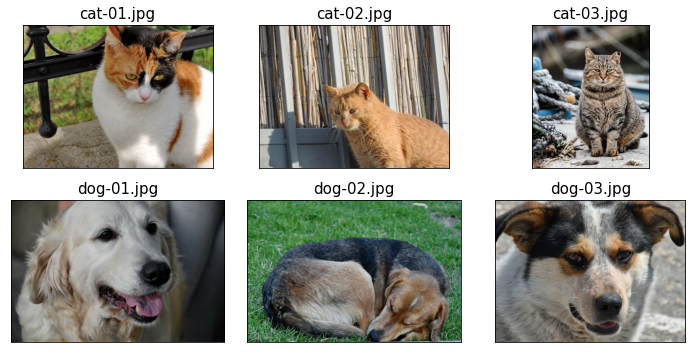

In [53]:
import matplotlib.pyplot as plt
import os

fig = plt.figure(figsize=(10, 5))
for i,file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print(f"Image shape - {os.path.basename(file)}: {img.shape}")
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
plt.tight_layout()
plt.show()

Apenas a partir desta visualização e das formas das imagens impressas, já podemos ver que as imagens possuem diferentes proporções. Se você imprimir as proporções (ou formas de matriz de dados) dessas imagens, verá que algumas imagens têm **900 pixels de altura e 1200 pixels de largura (900 × 1200 )**, algumas têm **800 × 1200 e uma tem 900 × 742**. Mais tarde, pré-processaremos essas imagens em um tamanho consistente. Outro ponto a ser considerado é que os rótulos dessas imagens são fornecidos dentro de seus nomes de arquivo. Então, extraímos esses rótulos da lista de nomes de arquivos, atribuindo o **rótulo 1** aos **cães** e o **rótulo 0** aos **gatos**:

In [54]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


Agora, temos duas listas: uma lista de nomes de arquivos (ou caminhos de cada imagem) e uma lista de seus rótulos. Anteriormente, aprendemos duas maneiras de criar um conjunto de dados conjunto de dois tensores. Aqui, usaremos a segunda abordagem da seguinte forma:

In [55]:
ds_files_labels = tf.data.Dataset.from_tensor_slices(
    (file_list, labels))

for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

b'cat_dog_images\\cat-01.jpg' 0
b'cat_dog_images\\cat-02.jpg' 0
b'cat_dog_images\\cat-03.jpg' 0
b'cat_dog_images\\dog-01.jpg' 1
b'cat_dog_images\\dog-02.jpg' 1
b'cat_dog_images\\dog-03.jpg' 1


Chamamos esse conjunto de dados de *ds_files_labels*, pois ele possui nomes de arquivos e rótulos. Em seguida, precisamos aplicar transformações a esse conjunto de dados: carregar o conteúdo da imagem de seu caminho de arquivo, decodificar o conteúdo bruto e redimensioná-lo para um tamanho desejado, por exemplo, **80 × 120**. Anteriormente, vimos como aplicar uma função `lambda` usando o método `.map()`. No entanto, como precisamos aplicar várias etapas de pré-processamento desta vez, vamos escrever uma função auxiliar e usá-la ao chamar o método `.map()`:

X: (80, 120, 3) - Y: 0
X: (80, 120, 3) - Y: 0
X: (80, 120, 3) - Y: 0
X: (80, 120, 3) - Y: 1
X: (80, 120, 3) - Y: 1
X: (80, 120, 3) - Y: 1


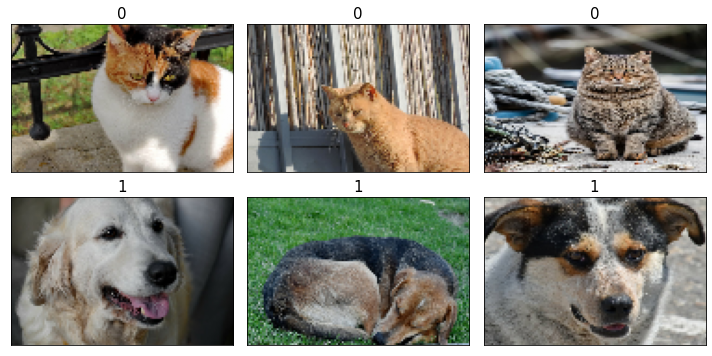

In [56]:
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0

    return image, label

img_width, img_height = 120, 80

ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize=(10, 5))
for i,example in enumerate(ds_images_labels):
    print(f"X: {example[0].shape} - Y: {example[1].numpy()}")
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()), 
                 size=15)
    
plt.tight_layout()
plt.show()

A função `load_and_preprocess()` envolve todas as quatro etapas em uma única função, incluindo o carregamento do conteúdo bruto, decodificá-lo e redimensionar as imagens. A função então retorna um conjunto de dados sobre o qual podemos iterar e aplicar outras operações que aprendemos anteriormente.

### Buscando conjuntos de dados disponíveis da biblioteca *tensorflow_datasets*
A biblioteca *tensorflow_datasets* fornece uma boa coleção de conjuntos de dados disponíveis gratuitamente para treinamento ou avaliação de modelos de aprendizado profundo. Os conjuntos de dados são bem formatados e vêm com descrições informativas, incluindo o formato dos recursos e rótulos e seu tipo e dimensionalidade, bem como a citação do artigo original que introduziu o conjunto de dados no formato *BibTeX*. Outra vantagem é que esses conjuntos de dados estão todos preparados e prontos para uso como objetos `tf.data.Dataset`, de modo que todas as funções que abordamos nas seções anteriores podem ser usadas diretamente. Então, vamos ver como usar esses conjuntos de dados em ação.

In [57]:
import tensorflow_datasets as tfds
print(len(tfds.list_builders()))

print("\n",tfds.list_builders()[:5])

278

 ['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']


O código anterior indica que existem atualmente 278 conjuntos de dados disponíveis (278 conjuntos de dados até o presente momento, mas esse número provavelmente aumentará) — imprimimos os primeiros cinco conjuntos de dados na linha de comando. Existem duas maneiras de buscar um conjunto de dados, que abordaremos nos parágrafos a seguir, buscando dois conjuntos de dados diferentes: *CelebA* (`celeb_a`) e o conjunto de dados de dígitos *MNIST*.

A primeira abordagem consiste em três etapas:
1. Chamando a função do criador de conjunto de dados
2. Executando o método `download_and_prepare()`
3. Chamando o método `as_dataset()`

Vamos trabalhar com a primeira etapa para o conjunto de dados *CelebA* e imprimir a descrição associada fornecida na biblioteca:

In [62]:
ds_bldr = tfds.builder('coil100')
print(ds_bldr.info.features)

FeaturesDict({
    'angle': tf.int64,
    'angle_label': ClassLabel(shape=(), dtype=tf.int64, num_classes=72),
    'image': Image(shape=(128, 128, 3), dtype=tf.uint8),
    'object_id': ClassLabel(shape=(), dtype=tf.int64, num_classes=100),
})


In [63]:
print(ds_bldr.info.features['image'])

Image(shape=(128, 128, 3), dtype=tf.uint8)


In [65]:
print(ds_bldr.info.citation)

@article{nene1996columbia,
  title={Columbia object image library (coil-20)},
  author={Nene, Sameer A and Nayar, Shree K and Murase, Hiroshi and others},
  year={1996},
  publisher={Technical report CUCS-005-96}
}


Isso fornece algumas informações úteis para entender a estrutura desse conjunto de dados. Os recursos são armazenados como um dicionário com três chaves: `image`, `landmarks`, and `attributes`.

A entrada `image` refere-se à imagem do rosto de uma celebridade; `landmarks` refere-se ao dicionário de pontos faciais extraídos, como a posição dos olhos, nariz e assim por diante; e `attributes` é um dicionário de 40 atributos faciais para a pessoa na imagem, como expressão facial, maquiagem, propriedades do cabelo e assim por diante. Em seguida, chamaremos o método `download_and_prepare()`. Isso fará o *download* dos dados e os armazenará em disco em uma pasta designada para todos os conjuntos de dados do *TensorFlow*. Se você já fez isso uma vez, ele simplesmente verificará se os dados já foram baixados para que não baixe novamente se já existir no local designado:

In [66]:
ds_bldr.download_and_prepare()

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 1/1 [00:53<00:00, 53.80s/ url]

Dl Completed...: 100%|██████████| 1/1 [01:31<00:00, 91.79s/ url]
                                                                        

Dataset coil100 downloaded and prepared to C:\Users\willi\tensorflow_datasets\coil100\2.0.0. Subsequent calls will reuse this data.
